In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns                       #visualisation

from matplotlib.colors import ListedColormap

In [2]:
#Visualizating the Data
df=pd.read_csv('/content/drive/MyDrive/EnhanceIT/Cirrhosis.csv')
df.head(5)

,index,duration,status,drug,age,sex,ascites,hepatomology,spiders,edema,bilirubin,cholesterol,albumin,copper,phosphatase,SGOT,triglicerides,platelets,prothrombin,stage
0,1,400,2,1,21464,1,1,1,1,1.0,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4
1,2,4500,0,1,20617,1,0,1,1,0.0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3
2,3,1012,2,1,25594,0,0,0,0,0.5,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4
3,4,1925,2,1,19994,1,0,1,1,0.5,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4
4,5,1504,1,2,13918,1,0,1,1,0.0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3


In [3]:
df.shape

(312, 20)

# Cleaning Data and EDA

In [4]:
#Modifying some values and eliminating unnessesary columns
df.age=df.age.values//365
df=df.drop(['index'], axis=1)

In [5]:
#Data ypes
df.dtypes

duration           int64
status             int64
drug               int64
age                int64
sex                int64
ascites            int64
hepatomology       int64
spiders            int64
edema            float64
bilirubin        float64
cholesterol      float64
albumin          float64
copper           float64
phosphatase      float64
SGOT             float64
triglicerides    float64
platelets        float64
prothrombin      float64
stage              int64
dtype: object

In [6]:
#Checking for Null/NaN values
df.isnull().sum()

duration          0
status            0
drug              0
age               0
sex               0
ascites           0
hepatomology      0
spiders           0
edema             0
bilirubin         0
cholesterol      28
albumin           0
copper            2
phosphatase       0
SGOT              0
triglicerides    30
platelets         4
prothrombin       0
stage             0
dtype: int64

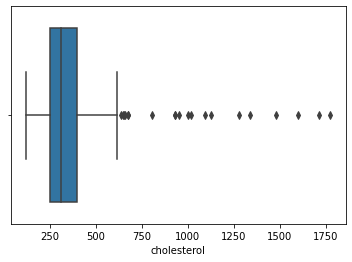

In [7]:
#Noting what happen or what can we do with the columns Cholesterol and Triglicerides
sns.boxplot(x=df['cholesterol'])

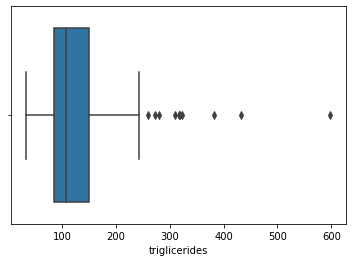

In [8]:
sns.boxplot(x=df['triglicerides'])

In [9]:
#Filling the Null values with the median and the mean
df.cholesterol=df.cholesterol.fillna(df.cholesterol.median())
df.triglicerides=df.triglicerides.fillna(df.triglicerides.mean())

In [10]:
#Dropping the rest of the Null values
df=df.dropna()

In [11]:
#Reviwing the Null values in the data set
df.isnull().sum()

duration         0
status           0
drug             0
age              0
sex              0
ascites          0
hepatomology     0
spiders          0
edema            0
bilirubin        0
cholesterol      0
albumin          0
copper           0
phosphatase      0
SGOT             0
triglicerides    0
platelets        0
prothrombin      0
stage            0
dtype: int64

In [12]:
#Checking and dropping for duplicates (in this  there were not duplicate data)
df.drop_duplicates()
df.shape

(306, 19)

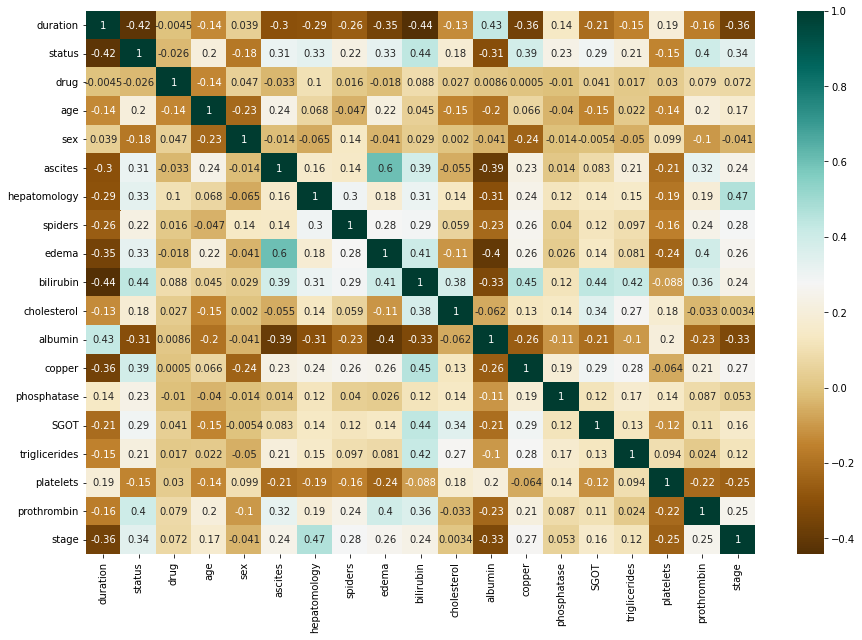

In [13]:
#Vizulating the correlation matrix
plt.figure(figsize=(15,10))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)


In [14]:
#Reseting the data after droppin the rows
df=df.reset_index()

In [181]:
df.shape

(306, 20)

In [182]:
##Getting the percentage of each class
df['status'].value_counts()*100/df.shape[0]

0    53.594771
2    40.196078
1     6.209150
Name: status, dtype: float64

In [185]:
#As we are going to take the status column as the dependant variable, let's see the amount of values for each option
df['status'].value_counts()

0    164
2    123
1     19
Name: status, dtype: int64

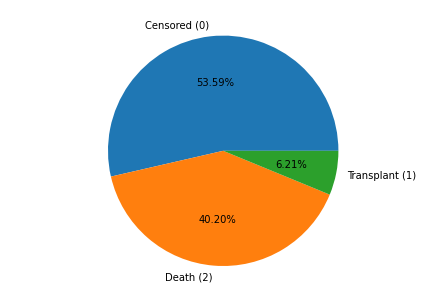

In [191]:
#Plotting the percentage of the classes in a pie chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ['Censored (0)','Death (2)','Transplant (1)']
students = df['status'].value_counts()
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.show()

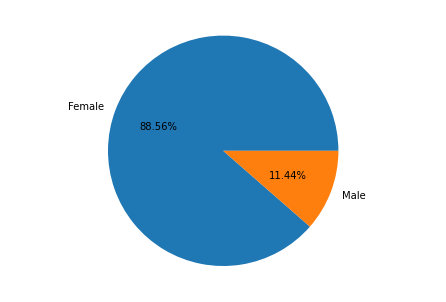

In [189]:
#Just for completion, the porcentage of sex
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ['Female','Male']
students = df['sex'].value_counts()
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.show()

No handles with labels found to put in legend.


Text(0, 0.5, 'Status')

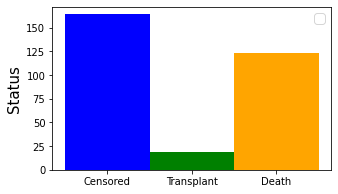

In [279]:
#Another visualization of the classes
cs=df.status[df.status==0]
trans=df.status[df.status==1]
death=df.status[df.status==2]

fig, ax = plt.subplots(figsize=(5,3))
ax.hist(death, color=['orange'], bins=1)
ax.hist(trans, color=['green'], bins=1)
ax.hist(cs, color=['blue'], bins=1)
ax.set_xticks(np.arange(3))
ax.set_xticklabels(['Censored','Transplant', 'Death'], size=10)
plt.legend(fontsize=13)
plt.ylabel('Status', size=15)

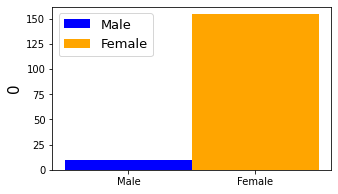

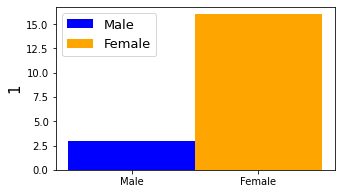

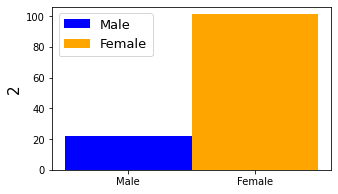

In [282]:
#How many MAle and Females per class
for i in range(3):
  male=df[df.status==i].sex[df.sex==0]
  female=df[df.status==i].sex[df.sex==1]

  fig, ax = plt.subplots(figsize=(5,3))
  ax.hist(male, color=['blue'], label=['Male'], bins=1)
  ax.hist(female, color=['orange'],label=['Female'], bins=1)
  ax.set_xticks(np.arange(2))
  ax.set_xticklabels(['Male','Female'], size=10)
  plt.legend(fontsize=13)
  plt.ylabel(i, size=15)


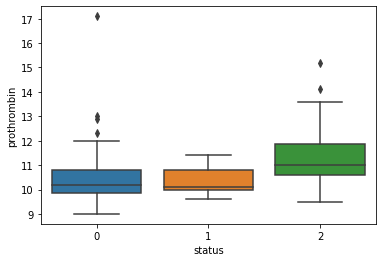

In [278]:
#As a part of the exploratory analysis we see the behavior of the status with some variables: Cholesterol, copper, age and prothrombin
sns.boxplot(y='prothrombin', data=df, x='status')

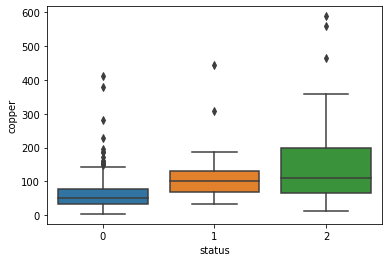

In [277]:
sns.boxplot(y='copper', data=df, x='status')


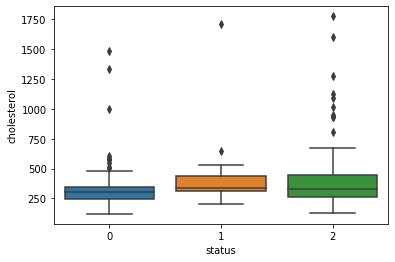

In [274]:
#Let's take a look of the behavior of the duration and the age for each status
sns.boxplot(y='cholesterol', data=df, x='status')

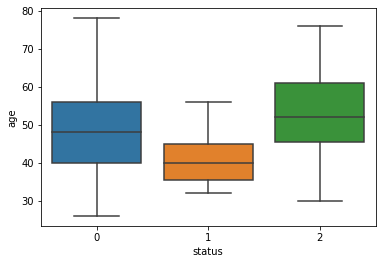

In [18]:
sns.boxplot(y='age', data=df, x='status')

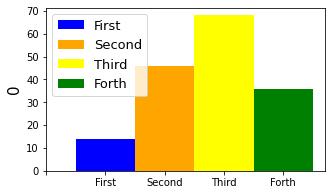

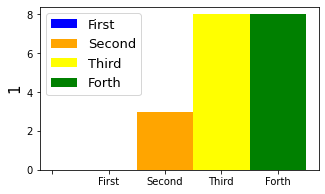

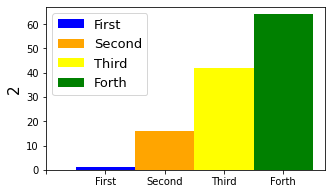

In [19]:
##Analysing the stage of the disease per class
for i in range(3):
  first=df[df.status==i].stage[df.stage==1]
  second=df[df.status==i].stage[df.stage==2]
  third=df[df.status==i].stage[df.stage==3]
  forth=df[df.status==i].stage[df.stage==4]

  fig, ax = plt.subplots(figsize=(5,3))
  ax.hist(first, color=['blue'], label=['First'], bins=1)
  ax.hist(second, color=['orange'],label=['Second'], bins=1)
  ax.hist(third, color=['yellow'],label=['Third'], bins=1)
  ax.hist(forth, color=['green'],label=['Forth'], bins=1)
  ax.set_xticks(np.arange(5))
  ax.set_xticklabels(['','First','Second','Third','Forth'], size=10)
  plt.legend(fontsize=13)
  plt.ylabel(i, size=15)


# Algorithm

In [280]:
#Defining the functions to use
def indices_to_one_hot(data, nb_classes):
  targets=np.array(data).reshape(-1)
  return np.eye(nb_classes)[targets]

def cross_entropy(Y,P_hat):
  return -(1/len(Y))*np.sum(np.sum(Y*np.log(P_hat), axis=1), axis=0)

def softmax(H):
  eH = np.exp(H)
  return eH/eH.sum(axis=1, keepdims=True)

def accuracy(y,y_hat):
  return np.mean(y==y_hat)

def one_hot_encode(y):
  N=len(y)
  K=len(set(y))
  Y = np.zeros((N,K))
  for i in range(N):
    Y[i,y[i]]=1
  return Y


In [281]:
#Defining the variables
y=df['status'].to_numpy()


In [216]:
#Choosing the variables to use in the model
x=df[['hepatomology','copper','ascites','hepatomology','edema','bilirubin','albumin','prothrombin']]

In [217]:
x.columns

Index(['hepatomology', 'copper', 'ascites', 'hepatomology', 'edema',
       'bilirubin', 'albumin', 'prothrombin'],
      dtype='object')

In [218]:
X=x.to_numpy()

In [219]:
#Normalizing the data
X=(X-X.min())/(X.max()-X.min())

In [292]:
#Dividing in train and test data
X_train=X[:250,:]
X_test=X[250:,:]
y_train=y[:250]
y_test=y[250:]

In [283]:
#Definining the Algorithm
class Shallow_ANN():

  def fit(self, X, y, neurons=10, eta =1e-3, epochs=1e3,show_curve= False):
    epochs=int(epochs)
    Y=one_hot_encode(y)

    N,D=X.shape
    K=Y.shape[1]

    self.W = {l: np.random.randn(M[0],M[1]) for l, M in enumerate(zip([D,neurons],[neurons, K]),1)}
    self.b = {l: np.random.randn(M) for l, M in enumerate([neurons, K],1)}

    self.a = {1: np.tanh, 2:softmax}


    J =  np.zeros(epochs)
    for epoch in range(epochs):
      self.__forward__(X)
      J[epoch] = cross_entropy(Y, self.Z[2])
    
    ##Weight update rule:
      self.W[2] -= eta*(1/N)*self.Z[1].T@(self.Z[2]-Y)
      self.W[1] -= eta*(1/N)*X.T@((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2))
      ##Bias update rule:
      self.b[2] -= eta*(1/N)*(self.Z[2]-Y).sum(axis=0)
      self.b[1] -= eta*(1/N)*((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2)).sum(axis=0)
    
    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel('epochs')
      plt.ylabel('$\mathcal{J}$')
      plt.title('Training Curve')
    
  def __forward__(self, X):
    self.Z ={0:X}

    for l in sorted(self.W.keys()):
        self.Z[l] = self.a[l](self.Z[l-1]@self.W[l]+self.b[l])
  
  def predict(self, X):
    self.__forward__(X)#Printing the probabilities too
    return self.Z[2].argmax(axis=1),self.Z[2]


In [286]:
#Defining an instance
ann=Shallow_ANN()

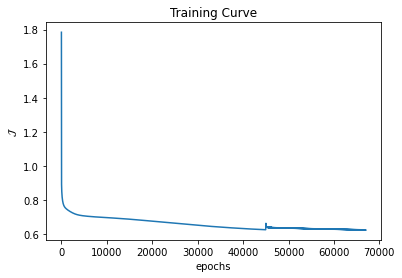

In [296]:
#Making the fit with th proper values for neurons, eta and epochs
ann.fit(X_train,y_train,neurons=10,eta=0.05,epochs=67010, show_curve=True)

In [297]:
#Prediction and proabilities with the training data
y_hat_train, probs_train = ann.predict(X_train)


In [298]:
#Accuracy of the training data
accuracy(y_train,y_hat_train)

0.728

In [299]:
#Prediction and proabilities with the test data
y_hat_test, probs_test = ann.predict(X_test)


In [300]:
#Accuracy of the test data
accuracy(y_test,y_hat_test)

0.6785714285714286

In [310]:
#Creation of a data frame of the probabilites
result=pd.DataFrame(probs_test)
result.head(10)


,0,1,2
0,0.839933,0.033979,0.126088
1,0.715131,0.048004,0.236865
2,0.726844,0.040524,0.232632
3,0.089604,0.040857,0.869539
4,0.356984,0.057773,0.585243
5,0.666264,0.046141,0.287596
6,0.755494,0.039824,0.204682
7,0.155768,0.055069,0.789163
8,0.340955,0.054416,0.604628
9,0.809370,0.038302,0.152327


In [311]:
#Data Frame comapring the actual values with the predicted by the model
results_test=pd.DataFrame({'Actual': y_test, 'prediction': y_hat_test})
results_test.head(8)

,Actual,prediction
0,0,0
1,0,0
2,0,0
3,0,2
4,0,2
5,0,0
6,1,0
7,1,2


<function matplotlib.pyplot.show>

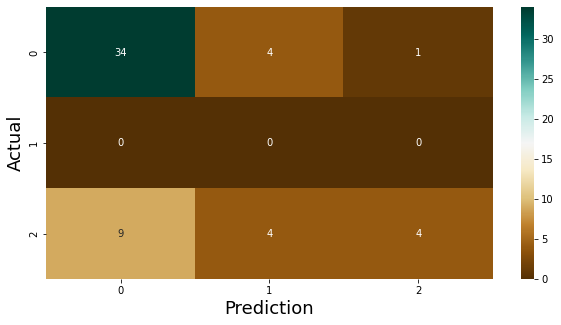

In [301]:
#Getting the confusion matrix
confusion_matrix1=[]
for i in range(0,3):
  b=[]
  for j in range(0,3):
    x=results_test[(results_test['Actual']==j)&(results_test['prediction']==i)].shape[0]
    b.append(x)
  confusion_matrix1.append(b)
plt.figure(figsize=(10,5))
matrix=pd.DataFrame(confusion_matrix1)
sns.heatmap(matrix, cmap="BrBG",annot=True)
plt.xlabel('Prediction',fontsize=18)
plt.ylabel('Actual',fontsize=18)
plt.show

In [ ]:
#Plotting accuaracy against epochs in order to find the best one
def acEpochs(N):
  ann.fit(X_train,y_train,neurons=10,eta=1e-3,epochs=N, show_curve=False)
  y_hat=ann.predict(X_train)
  return accuracy(y_train,y_hat)
p=0
epochs=[i for i in range(10,100000,1000)]
accs=np.zeros(len(epochs))
for i in range(len(epochs)):
  accs[i]=acEpochs(epochs[i])
  p=p+1
  print(p)

No handles with labels found to put in legend.


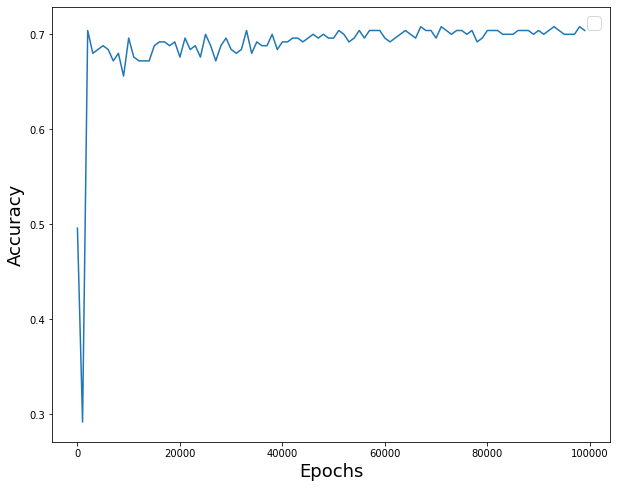

In [233]:
plt.figure(figsize=(10,8))
plt.clf()
plt.plot(epochs,accs)
#plt.plot(best_e,max_acc,'*',markersize=20,label='Best model')
plt.xlabel('Epochs',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.legend(fontsize=18)

In [235]:
in_epoch=np.where(accs==max(accs))[0][0]
Epoch_ef=epochs[in_epoch]
Epoch_ef

67010

In [ ]:
#Plotting accuaracy against Learning rate in order to find the best one

def acLR(N):
  ann.fit(X_train,y_train,neurons=10,eta=N,epochs=Epoch_ef, show_curve=False)
  y_hat=ann.predict(X_train)
  return accuracy(y_train,y_hat)
c=0
LRs=np.linspace(1e-5,.1,100)
accsLr=np.zeros(len(LRs))
for i in range(len(LRs)):
  accsLr[i]=acLR(LRs[i])
  c=c+1
  print(c)

No handles with labels found to put in legend.


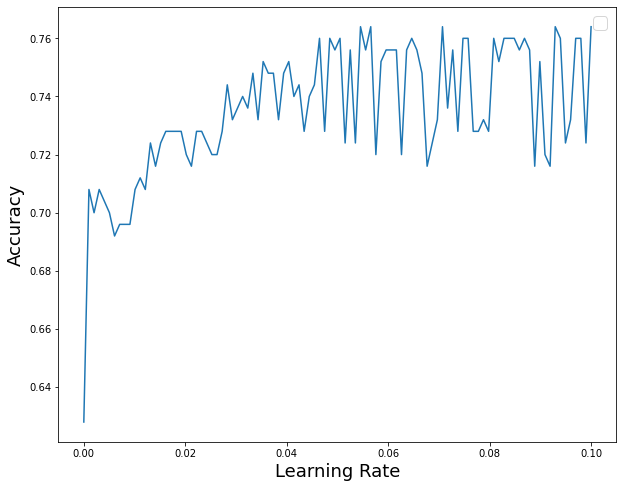

In [237]:
plt.figure(figsize=(10,8))
plt.clf()
plt.plot(LRs,accsLr)
#plt.plot(best_e,max_acc,'*',markersize=20,label='Best model')
plt.xlabel('Learning Rate',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.legend(fontsize=18)

In [238]:
in_LR=np.where(accsLr==max(accsLr))[0][0]
LR_ef=LRs[in_LR]
LR_ef

0.05455000000000001

In [ ]:
#Plotting accuaracy against neurons in order to find the best one

def acNN(N):
  ann.fit(X_train,y_train,neurons=N,eta=LR_ef,epochs=Epoch_ef, show_curve=False)
  y_hat=ann.predict(X_train)
  return accuracy(y_train,y_hat)
t=0
NNs=np.linspace(1,50,50)
accsNN=np.zeros(len(NNs))
for i in range(len(NNs)):
  accsNN[i]=acNN(int(NNs[i]))
  t=t+1
  print(t)

No handles with labels found to put in legend.


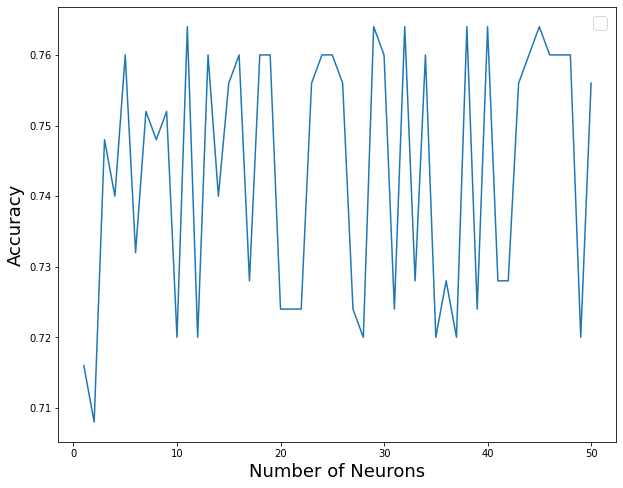

In [242]:
plt.figure(figsize=(10,8))
plt.clf()
plt.plot(NNs,accsNN)
#plt.plot(best_e,max_acc,'*',markersize=20,label='Best model')
plt.xlabel('Number of Neurons',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.legend(fontsize=18)

In [241]:
in_NN=np.where(accsNN==max(accsNN))[0][0]
NN_ef=NNs[in_NN]
NN_ef

11.0

In [115]:
import shap

In [135]:
#Exploring how the variables affect the model
f = lambda x: ann.predict(x)[0]
med = np.median(X_train, axis = 0).reshape(1, X_train.shape[1])
explainer = shap.Explainer(f, med, feature_names = ['age', 'sex', 'ascites', 'hepatomology', 'spiders', 'edema',
       'bilirubin', 'cholesterol', 'albumin', 'copper', 'phosphatase', 'SGOT',
       'triglicerides', 'prothrombin', 'stage'])

shap_values = explainer(X_train)

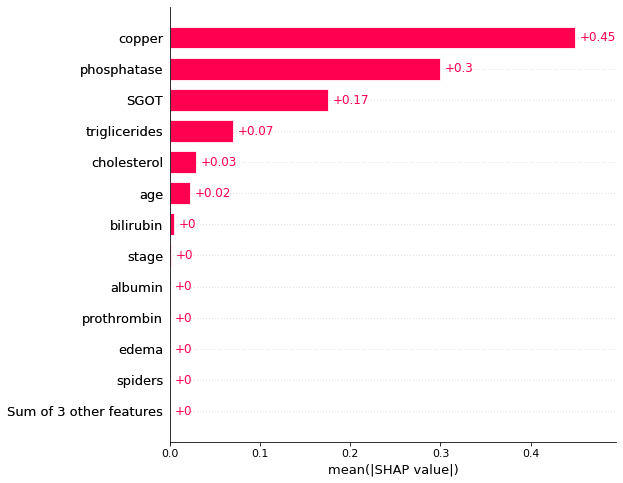

In [139]:
shap.plots.bar(shap_values, max_display=13)

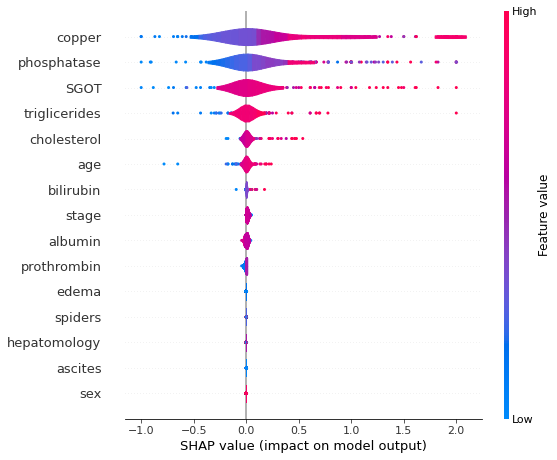

In [140]:
shap.summary_plot(shap_values, plot_type='violin')

In [206]:
df.columns

Index(['index', 'duration', 'status', 'drug', 'age', 'sex', 'ascites',
       'hepatomology', 'spiders', 'edema', 'bilirubin', 'cholesterol',
       'albumin', 'copper', 'phosphatase', 'SGOT', 'triglicerides',
       'platelets', 'prothrombin', 'stage'],
      dtype='object')

In [208]:
xx=df[['hepatomology','copper','ascites','hepatomology','edema','bilirubin','albumin','prothrombin']]

In [209]:
XX=xx.to_numpy()
XX=(XX-XX.min())/(XX.max()-XX.min())

In [210]:
XX_train=XX[:250,:]
y_train.shape
XX_test=XX[250:,:]

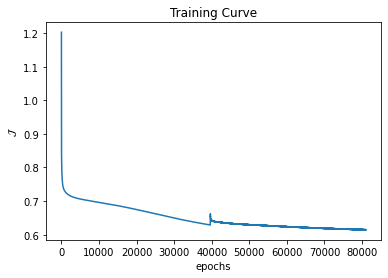

In [211]:
ann.fit(XX_train,y_train,neurons=5,eta=0.06,epochs=81010, show_curve=True)

In [205]:
XX_train.shape

(250, 10)

In [212]:
yy_hat_train, probs=ann.predict(XX_train)

In [213]:
accuracy(y_train,yy_hat_train)

0.728

In [214]:
yy_hat_test, probs=ann.predict(XX_test)

In [215]:
accuracy(y_test,yy_hat_test)

0.6785714285714286